### Imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

### Load the Dataset

In [ ]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Dataset Statistics

In [ ]:
print(f'Len of Dataset before dropping duplicate rows {len(df)}')

Len of Dataset before dropping duplicate rows 5728


In [ ]:
print(f'No of Ham Messages before dropping any duplicates {len(df[df.spam == 0])}')

No of Ham Messages before dropping any duplicates 4360


In [ ]:
print(f'No of Spam Messages before dropping any duplicates {len(df[df.spam == 1])}')

No of Spam Messages before dropping any duplicates 1368


### Check for Missing Values

<AxesSubplot:>

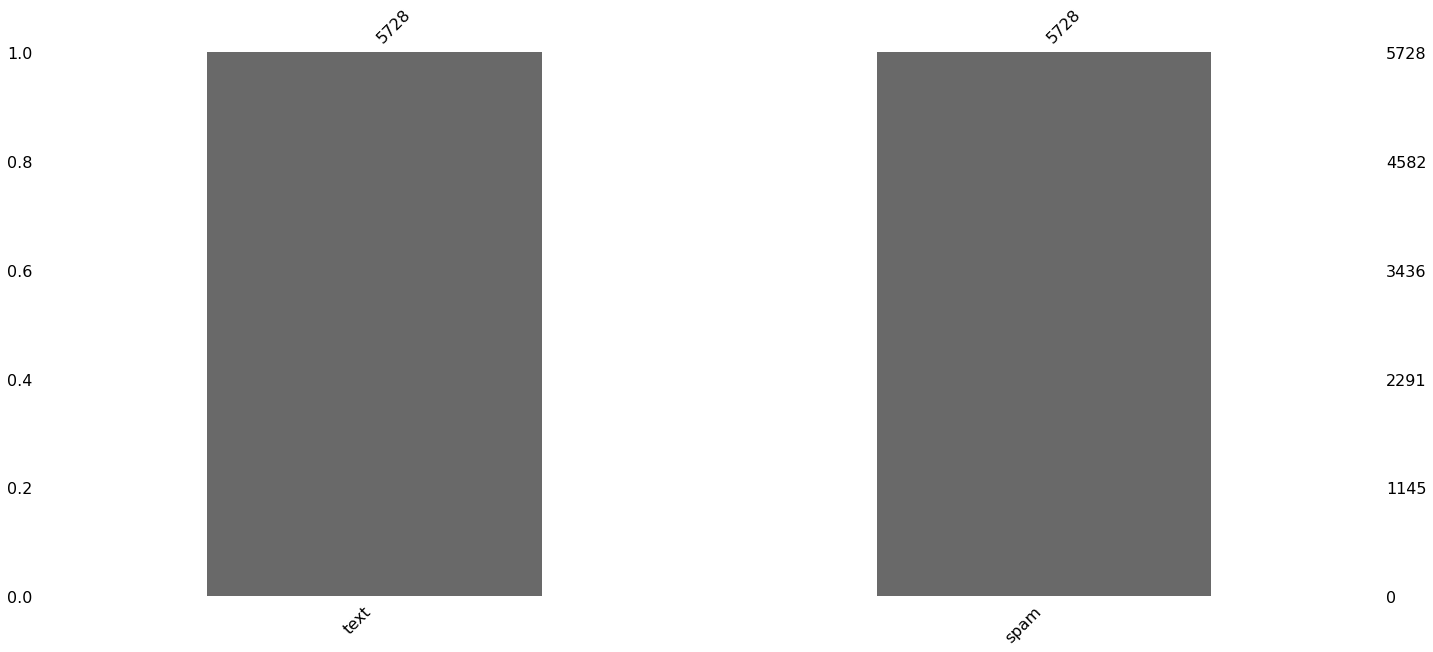

In [ ]:
import missingno 
missingno.bar(df)

### Drop Duplicates

In [ ]:
# df = df.drop_duplicates()
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Dataset Statistics

In [ ]:
print(f'Len of Dataset after dropping duplicate rows {len(df)}')

Len of Dataset after dropping duplicate rows 5728


In [ ]:
print(f'No of Ham Messages after dropping any duplicates {len(df[df.spam == 0])}')

No of Ham Messages after dropping any duplicates 4360


In [ ]:
print(f'No of Spam Messages after dropping any duplicates {len(df[df.spam == 1])}')

No of Spam Messages after dropping any duplicates 1368


### FIrst Word in the Email 

### List of all punctuation characters

In [ ]:
import string
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


### NLTK RegexTokenzier to select alphanumeric words only 

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
' '.join(tokenizer.tokenize('''Eighty '!!##'-seven! miles to go, yet.  Onward!'''))

'Eighty seven miles to go yet Onward'

### Function to remove punctuations from the string

In [ ]:
def remove_punctuations(input_sentence):
    sentence_words_list_without_punctuations = tokenizer.tokenize(input_sentence)
    processed_string = ' '.join(sentence_words_list_without_punctuations)
    return processed_string

In [ ]:
test_string = '''Eighty '!!##'-seven! miles to go, yet.  Onward!'''
remove_punctuations(test_string)

'Eighty seven miles to go yet Onward'

### Removing Punctuations from the text col of the dataset

In [ ]:
# df['text'] = df['text'].apply(remove_punctuations)
# df.head()

### Getting first word of all rows of the dataset 

### First word for all rows in the dataset

In [ ]:
df['text'].apply(lambda x: x.split(' ')[0].lower()).unique()[0]

'subject:'

Which word appears at the beginning of every email in the dataset? Respond as a lower-case word with punctuation removed.

Ans ==> subject

### Analyzing Lengths of emails of the given dataset 

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

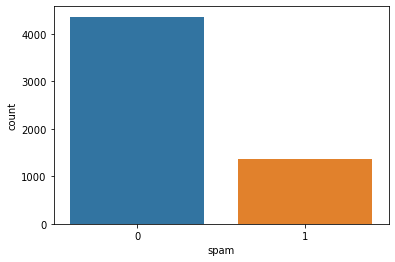

In [ ]:
sns.countplot(df['spam'])

### Add a new col to store the length of the text 

In [ ]:
df['text_length'] = df['text'].apply(len)

df.head()

,text,spam,text_length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


### Analyzing the lengths of the spam messages

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_length', ylabel='Density'>

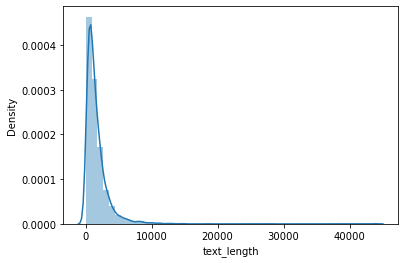

In [ ]:
sns.distplot(df[df['spam'] == 0]['text_length'])

In [ ]:
df[df['spam'] == 0]['text_length'].median()

1122.0

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_length', ylabel='Density'>

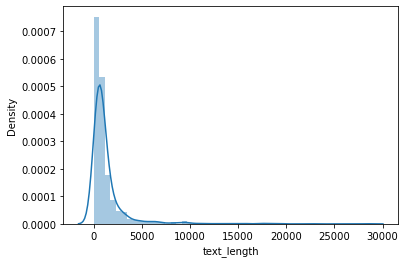

In [ ]:
sns.distplot(df[df['spam'] == 1]['text_length'])

In [ ]:
df[df['spam'] == 1]['text_length'].median()

693.5

### Median amount of words in spam is much less than ham messages

In [ ]:
spam_messages = df[df['spam'] == 1]['text'].values
ham_messages = df[df['spam'] == 0]['text'].values

### Frequency Dist for Spam Messages

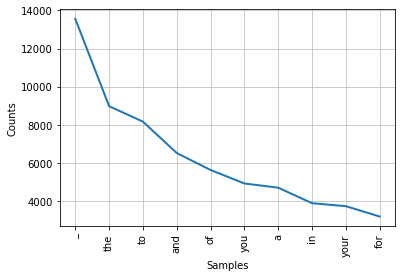

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
fd = nltk.FreqDist(tokenizer.tokenize(' '.join(spam_messages)))
fd.plot(10, cumulative=False)

### Frequency Dist for Ham Messages

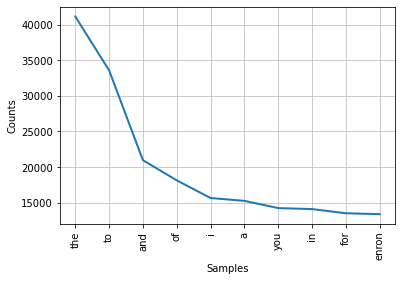

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
fd = nltk.FreqDist(tokenizer.tokenize(' '.join(ham_messages)))
fd.plot(10,cumulative=False)

### Maximum Characters Email 

In [ ]:
df.head()

,text,spam,text_length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [ ]:
print(f'Max characters in an email in the given Dataset ==> {df.text_length.max()}')

Max characters in an email in the given Dataset ==> 43952


### Creating new Corpus DataFrame

In [ ]:
corpus = pd.DataFrame()
corpus['text'] = df['text']
corpus['spam'] = df['spam']
corpus.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Converting Text to LowerCase

In [ ]:
# convert text to lowercase
corpus['text'] = corpus['text'].apply(lambda x: x.lower())

### Removing Puncutations from the DataFrame

In [ ]:
# remove the punctuations from the dataset
corpus['text'] = corpus['text'].map(remove_punctuations)

### Remove Special Characters

In [ ]:
import re

def removeSpecialCharacters(sentence):
    sentence = sentence.replace('_','')
    return sentence

In [ ]:
# remove the punctuations from the dataset
corpus['text'] = corpus['text'].map(removeSpecialCharacters)

### Stopwords English

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Create a StopWords Dictionary Object

In [ ]:
from collections import Counter
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

### Removing Stopwords from the Corpus

In [ ]:
sentence = 'Jiten is not a lazy person'
modified_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_dict])
modified_sentence

'Jiten lazy person'

In [ ]:
def remove_stopwords_from_sentence(sentence):
    modified_sentence = ' '.join([word for word in sentence.split() if word not in stopwords_dict])
    return modified_sentence

# remove stopwords from the sentence
corpus['text'] = corpus['text'].apply(remove_stopwords_from_sentence)

In [ ]:
corpus.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1


### Create a Stemmer Object 

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

### Stem the Words

In [ ]:
def stem_words_in_sentence(sentence):
    modified_sentence = ' '.join([ps.stem(word) for word in sentence.split()])
    return modified_sentence

corpus['text'] = corpus['text'].apply(stem_words_in_sentence)
corpus.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
document_term_matrix  = vec.fit_transform(corpus['text'])

In [ ]:
document_term_matrix.shape

(5728, 29222)

### No of terms in dtm

In [ ]:
print(f'No of terms in the document term matrix is {document_term_matrix.shape[1]}')

No of terms in the document term matrix is 29222


### No of terms in spdtm

In [ ]:
five_percent_vectorizer = CountVectorizer(min_df = 0.05)
five_percent_document_term_matrix = five_percent_vectorizer.fit_transform(corpus['text'])

print(f'No of terms in the the five percent document term matrix is {five_percent_document_term_matrix.shape[1]}')

No of terms in the the five percent document term matrix is 366


### No of terms in TFidf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_document_term_matrix = tfidf_vectorizer.fit_transform(corpus['text'])

In [ ]:
print(f'No of terms in the the five percent document term matrix is {tfidf_document_term_matrix.shape[1]}')

No of terms in the the five percent document term matrix is 29222


### Building Machine Learning Models

### Training the CART Model

In [ ]:
SEED = 123
np.random.seed(SEED)

### Train Test Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(document_term_matrix, corpus['spam'], test_size=0.3, random_state=SEED)

### CART MODEL


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Training Data Accuracy on CART Model

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X_test), y_test))

0.9586969168121


### Plot the classification Report for the CART Model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1314
           1       0.92      0.91      0.91       405

    accuracy                           0.96      1719
   macro avg       0.94      0.94      0.94      1719
weighted avg       0.96      0.96      0.96      1719



### Check the Confusion Matrix for the CART Model

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(clf.predict(X_test), y_test))

[[1281   33]
 [  38  367]]


### Training the Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Training Data Accuracy of Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(random_forest_classifier.predict(X_test), y_test))

0.9767306573589296


### Classification Report on Random Forest

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(random_forest_classifier.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1355
           1       0.91      0.99      0.95       364

    accuracy                           0.98      1719
   macro avg       0.95      0.98      0.97      1719
weighted avg       0.98      0.98      0.98      1719



### Confusion Matrix of Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(random_forest_classifier.predict(X_test), y_test))

[[1317   38]
 [   2  362]]


### Conclusion

1. Performed Cleaning on Text Data (removal of stop words, stemming).
2. Trained Decision tree, Random Forest models for spam prediction.
3. Analyzed the impact of frequent words in spam or ham messages with word dit frequency plots.
4. Later analyzed prediction power of model for both the classes using classification report.
5. Cleaning textual data is very important or else because of high cardinality of data model performance will drop significantly.
6. Now a days neural networks are also used with word embedding such as Glove, Bert etc. These embeddings have contextual information about words and also capture relationsip among the words.

### References

1. [Nltk](https://www.nltk.org/)
2. [Sklearn Python Package](https://scikit-learn.org/stable/index.html)
3. [Stemming vs Lemmatization](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/#:~:text=Stemming%20and%20lemmatization%20are%20methods,the%20word%20is%20being%20used.)